<a href="https://colab.research.google.com/github/Aparna0112/DL-Projects/blob/main/Project_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT :  FLOWER  CLASSIFICATION**

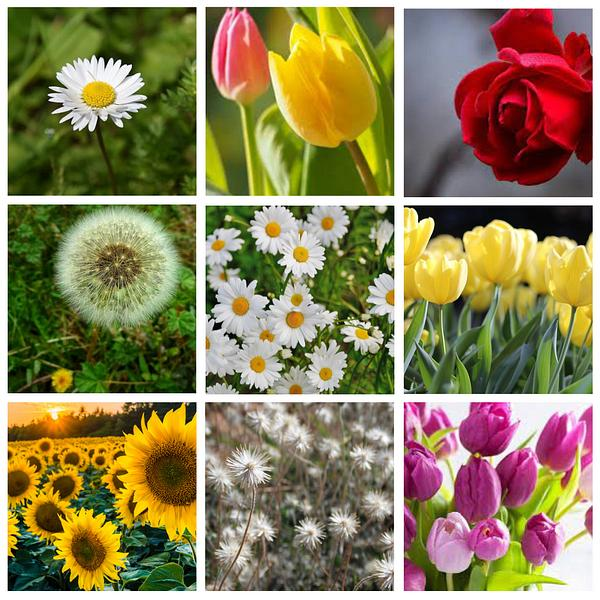

**Goal** : This project aims to develop a model for identifying five different
flower species (rose, tulip, sunflower, dandelion, daisy) using Convolutional Neural Networks (CNNs)



**Desciption**

*   The dataset consists of 5,000 images (1,000 images per class) collected from various online sources.
*  The model achieved an accuracy of 98% on the test set.



**Import all required libraries**

In [1]:
import pandas as pd
import os
import  numpy as np
from skimage.io import imread
from skimage.transform import resize
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

**Store image**

In [2]:
data=[]
target=[]
categories=['rose','tulip','sunflower','dandelion','daisy']
datadir='/content/drive/MyDrive/Datasets/flowers'
for category in categories:
  print("Loading Category.......",category)
  path=os.path.join(datadir,category)
  #print(path)
  images=os.listdir(path)
  #print(images)
  for img in images:
    img_path=os.path.join(path,img)
    #print(img_path)
    img_arr=imread(img_path)
    #print(img_arr)
    img_resized=resize(img_arr,(150,150,3))
    data.append(img_resized)
    target.append(categories.index(category))
  print("Completed...",category)


Loading Category....... rose
Completed... rose
Loading Category....... tulip
Completed... tulip
Loading Category....... sunflower
Completed... sunflower
Loading Category....... dandelion
Completed... dandelion
Loading Category....... daisy
Completed... daisy


**Convert list into array**

In [3]:
X_train=np.array(data)
y_train=np.array(target)

**Find the shape of X and y**

In [4]:
X_train.shape

(4317, 150, 150, 3)

In [5]:
y_train.shape

(4317,)

**Create Model**

In [6]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(150,150,3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Adding dropout for regularization
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))

**Compilation**

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
c=model.fit(X_train,y_train,epochs=25,batch_size=5)


Epoch 1/25
864/864 [==============================] - 16s 10ms/step - loss: 1.3889 - accuracy: 0.3757
Epoch 2/25
864/864 [==============================] - 7s 8ms/step - loss: 1.2970 - accuracy: 0.4234
Epoch 3/25
864/864 [==============================] - 7s 8ms/step - loss: 1.2550 - accuracy: 0.4672
Epoch 4/25
864/864 [==============================] - 6s 7ms/step - loss: 1.1782 - accuracy: 0.5196
Epoch 5/25
864/864 [==============================] - 7s 8ms/step - loss: 1.0816 - accuracy: 0.5733
Epoch 6/25
864/864 [==============================] - 6s 8ms/step - loss: 0.9642 - accuracy: 0.6426
Epoch 7/25
864/864 [==============================] - 7s 8ms/step - loss: 0.8767 - accuracy: 0.6743
Epoch 8/25
864/864 [==============================] - 7s 8ms/step - loss: 0.7933 - accuracy: 0.7072
Epoch 9/25
864/864 [==============================] - 8s 10ms/step - loss: 0.7256 - accuracy: 0.7329
Epoch 10/25
864/864 [==============================] - 7s 8ms/step - loss: 0.6854 - accuracy: 0.7

**Plotting the accuracy and loss**

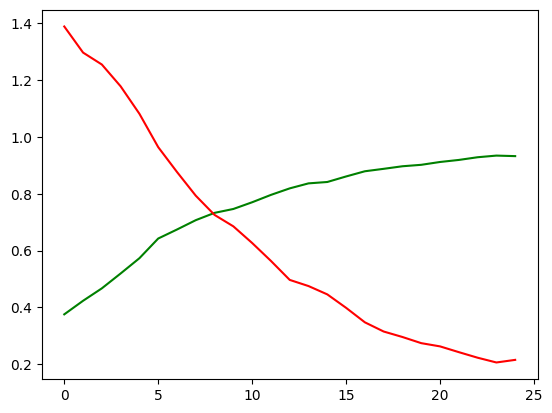

In [9]:
import matplotlib.pyplot as plt
plt.plot(c.history['accuracy'],color='green',label='Accuracy')
plt.plot(c.history['loss'],color='red',label='loss')





**Read a new image**

array([[[ 13,  27,  40],
        [  2,  82, 107],
        [  6,  68, 115],
        ...,
        [  5,  69, 105],
        [ 10,  75, 117],
        [ 14,  30,  30]],

       [[ 24,  76, 100],
        [ 25, 167, 255],
        [ 31, 149, 255],
        ...,
        [ 20, 156, 255],
        [  6, 168, 251],
        [ 12,  75, 116]],

       [[  0,  71, 116],
        [ 26, 155, 249],
        [167, 172, 168],
        ...,
        [109,  65, 180],
        [ 21, 151, 239],
        [  1,  68, 110]],

       ...,

       [[  8,  62, 106],
        [ 23, 153, 237],
        [ 99,  72, 127],
        ...,
        [255, 249, 252],
        [ 27, 155, 255],
        [ 14,  69,  89]],

       [[  0,  94, 144],
        [  9, 164, 247],
        [ 17, 161, 250],
        ...,
        [ 26, 168, 244],
        [ 18, 163, 246],
        [  0,  88, 135]],

       [[ 16,  14,  15],
        [ 30,  76, 110],
        [ 29,  64, 102],
        ...,
        [ 23,  68,  91],
        [ 25,  75, 110],
        [ 18,  18,  20]]], dtype=uint8)
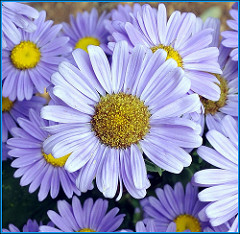

In [10]:
path1='//content/drive/MyDrive/Datasets/flowers/daisy/2812442552_3eed5fb9f2_m.jpg'
img=imread(path1)
img

**Resize image**

In [11]:
img=resize(img,(150,150,3))
img.shape

(150, 150, 3)

In [12]:
img=img.reshape(1,150,150,3)
img.shape

(1, 150, 150, 3)

**Predict a new image**

In [13]:
pred=model.predict(img)
pred

1/1 [==============================] - 0s 481ms/step


array([[1.47537116e-06, 1.28131442e-05, 1.56410411e-02, 1.30202725e-05,
        9.84331608e-01]], dtype=float32)

In [14]:
ind=pred.argmax(axis=1)
ind

array([4])

In [15]:
categories[ind.item()]

'daisy'

**Save the model**

In [16]:
from keras.models import load_model
model.save('flowerclass_model.h5')
